### Data Preparation and Processing

In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_labels = []
train_samples = []

Generate a data set as follows:
 - An experimental drug was tested on individuals from ages 13 to 100 in a clinical trial.
 - The trial had 2100 participants. Half were under 65 years old, half were 65 years or older.
 - Around 95% of patients 65 or older experienced side effects.
 - Around 95% of patients under 65 experienced no side effects.

In [3]:
for i in range(50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    # The ~5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)
    
for i in range(1000):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    # The ~5% of older individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

### Processing the data
 - These list data needs to pass to the `fit` function as `np.array`s.
 - Shuffle the data to remove any imposed order from the data generation.
 - Normalize or Standardize to make the training process to become quicker.

In [4]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [5]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

### Simple tf.keras Sequential Model

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [13]:
# If you are runing on a GPU run the following
# physical_devices = tf.config.experimental.list_physical_devices('GPU')
# print("Num GPUs Available: ", len(physical_devices))
# ft.config.experimental.set_memory_growth(physical_devices[0], True)

The simplest model you can build with keras tensorflow is a `Sequential model`.
 - 1st hidden layer has 16 Neurons and is identified with `input_shape = (1,)`
 - 2nd hidden layer has 32 Neurons
 - Out layer has two outputs giving probabilities with the `softmax` activation

In [15]:
model = Sequential([
            Dense(units=16, input_shape = (1,), activation = 'relu'),
            Dense(units=32, activation = 'relu'),
            Dense(units=2, activation = 'softmax'),])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer = Adam(learning_rate = 0.0001),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

Now the model is ready to learn.
 - `x` - Input data
 - `y` - Target data
 - `validation_split` - Creats a validation set".
 - `batch_size` - How many samples are inclued in one batch to be passed and processed at one time.
 - `epochs` - How many times will the model train on the full dataset before completing the training process.
 - `shuffle` - `True` by defult. (with validation_split assign this to be `True`).
 - `verbose` - How much detail you need to see in the outputs 0-2.

In [19]:
model.fit(x = scaled_train_samples,
          y = train_labels,
          batch_size = 10, 
          epochs = 30,
          shuffle = True,
          verbose = 2)

Epoch 1/30
210/210 - 1s - loss: 0.7042 - accuracy: 0.3986 - 674ms/epoch - 3ms/step
Epoch 2/30
210/210 - 0s - loss: 0.6728 - accuracy: 0.5943 - 211ms/epoch - 1ms/step
Epoch 3/30
210/210 - 0s - loss: 0.6428 - accuracy: 0.6452 - 254ms/epoch - 1ms/step
Epoch 4/30
210/210 - 0s - loss: 0.6169 - accuracy: 0.6719 - 276ms/epoch - 1ms/step
Epoch 5/30
210/210 - 0s - loss: 0.5927 - accuracy: 0.7043 - 265ms/epoch - 1ms/step
Epoch 6/30
210/210 - 0s - loss: 0.5638 - accuracy: 0.7419 - 314ms/epoch - 1ms/step
Epoch 7/30
210/210 - 0s - loss: 0.5312 - accuracy: 0.7914 - 248ms/epoch - 1ms/step
Epoch 8/30
210/210 - 0s - loss: 0.5011 - accuracy: 0.8138 - 272ms/epoch - 1ms/step
Epoch 9/30
210/210 - 0s - loss: 0.4723 - accuracy: 0.8362 - 242ms/epoch - 1ms/step
Epoch 10/30
210/210 - 0s - loss: 0.4451 - accuracy: 0.8581 - 215ms/epoch - 1ms/step
Epoch 11/30
210/210 - 0s - loss: 0.4202 - accuracy: 0.8662 - 226ms/epoch - 1ms/step
Epoch 12/30
210/210 - 0s - loss: 0.3974 - accuracy: 0.8814 - 255ms/epoch - 1ms/step
E

In [21]:
model.fit(x = scaled_train_samples,
          y = train_labels,
          validation_split = 0.1,
          batch_size = 10, 
          epochs = 30,
          shuffle = True,
          verbose = 2)

Epoch 1/30
189/189 - 0s - loss: 0.2583 - accuracy: 0.9344 - val_loss: 0.2593 - val_accuracy: 0.9524 - 424ms/epoch - 2ms/step
Epoch 2/30
189/189 - 0s - loss: 0.2572 - accuracy: 0.9360 - val_loss: 0.2581 - val_accuracy: 0.9524 - 235ms/epoch - 1ms/step
Epoch 3/30
189/189 - 0s - loss: 0.2559 - accuracy: 0.9386 - val_loss: 0.2571 - val_accuracy: 0.9524 - 239ms/epoch - 1ms/step
Epoch 4/30
189/189 - 0s - loss: 0.2546 - accuracy: 0.9344 - val_loss: 0.2562 - val_accuracy: 0.9524 - 273ms/epoch - 1ms/step
Epoch 5/30
189/189 - 0s - loss: 0.2537 - accuracy: 0.9344 - val_loss: 0.2552 - val_accuracy: 0.9524 - 267ms/epoch - 1ms/step
Epoch 6/30
189/189 - 0s - loss: 0.2527 - accuracy: 0.9349 - val_loss: 0.2545 - val_accuracy: 0.9524 - 250ms/epoch - 1ms/step
Epoch 7/30
189/189 - 0s - loss: 0.2518 - accuracy: 0.9344 - val_loss: 0.2537 - val_accuracy: 0.9524 - 247ms/epoch - 1ms/step
Epoch 8/30
189/189 - 0s - loss: 0.2512 - accuracy: 0.9392 - val_loss: 0.2531 - val_accuracy: 0.9524 - 234ms/epoch - 1ms/step


### Preprocess Test Data

In [22]:
test_labels = []
test_samples = []

In [23]:
for i in range(10):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    # The ~5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)
    
for i in range(200):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    # The ~5% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [24]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [25]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

### Predict

In [26]:
predictions = model.predict(x = scaled_test_samples, 
                            batch_size = 10, 
                            verbose = 0)

In [30]:
predictions[:10,]

array([[0.9658047 , 0.03419532],
       [0.96454585, 0.03545416],
       [0.9639523 , 0.03604766],
       [0.61088043, 0.3891195 ],
       [0.03415129, 0.9658486 ],
       [0.02049256, 0.9795074 ],
       [0.96540505, 0.03459502],
       [0.2046512 , 0.7953489 ],
       [0.0166771 , 0.9833229 ],
       [0.08335596, 0.9166441 ]], dtype=float32)

In [31]:
rounded_predictions = np.argmax(predictions, axis = -1)

In [33]:
rounded_predictions[:10]

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

### Confusion Matrix

In [38]:
%matplotlib inline
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
import itertools
import matplotlib.pyplot as plt

In [39]:
cm = confusion_matrix(y_true = test_labels, y_pred = rounded_predictions)

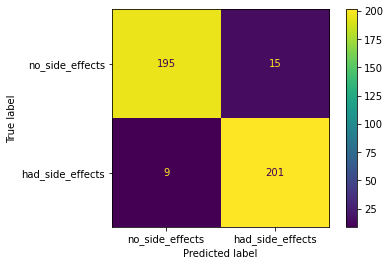

In [51]:

disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                              display_labels = ['no_side_effects',
                                                'had_side_effects'])
disp.plot()

plt.show()

### Saving the model
###    1. model.save()

In [52]:
# Checks first to see if file exists already.
# If not, the model is saved to disk.
import os.path
if os.path.isfile('models/medical_trial.model.h5') is False:
    model.save('models/medical_trial.model.h5')

This save function saves:
 - The architecture of the model, allowing to re-create the model.
 - The weights of the model.
 - The training configuration (loss, optimizer).
 - The state of the optimizer, allowing to resume training exaclty where you left off.

### Loading a saved model

In [53]:
from tensorflow.keras.models import load_model
new_model = load_model('models/medical_trial.model.h5')

In [54]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [55]:
new_model.optimizer

###    2. model.to_json()

If you only need to save the architecture of a model, and not its weights or its training configuration, you can use the following function to save the architecture only.

In [57]:
# save as JSON
json_string = model.to_json()

# save as YAML
# yaml_string = model.to_yaml()

In [58]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

In [60]:
# nodel reconstruction from JSON:
from tensorflow.keras.models import model_from_json

model_architecture = model_from_json(json_string)

# nodel reconstrunciton from YAML
# model = model_from_yaml(yaml_string)

In [61]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


###    3.model.save_weights()

If you only need to save the weights of a model, you can use the following funciton.

In [62]:
# Checks first to see if file exists already.
# If not, the model is saved to disk.
import os.path
if os.path.isfile('models/my_model_weights.h5') is False:
    model.save_weights('models/my_model_weights.h5')

In [63]:
model2 = Sequential([
            Dense(units=16, input_shape = (1,), activation = 'relu'),
            Dense(units=32, activation = 'relu'),
            Dense(units=2, activation = 'softmax'),])

In [64]:
model2.load_weights('models/my_model_weights.h5')

In [65]:
model2.get_weights()

[array([[ 0.5688508 ,  0.45852476, -0.30137765, -0.18403837,  0.69981056,
         -0.02368093,  0.44691607,  0.33439428, -0.10728469, -0.36941245,
          0.3931064 , -0.0090971 ,  0.56789184, -0.3075725 , -0.3445556 ,
         -0.28646365]], dtype=float32),
 array([-0.16087231, -0.16785799,  0.        ,  0.        ,  0.00112   ,
         0.        , -0.16598879, -0.13661431,  0.        ,  0.        ,
        -0.13939442,  0.        , -0.19186896,  0.        ,  0.        ,
         0.        ], dtype=float32),
 array([[-0.33989275,  0.177096  ,  0.25237936, -0.10648417,  0.22789483,
          0.4371213 ,  0.07137917,  0.43031147, -0.11528274, -0.21915755,
         -0.21440734,  0.38516572,  0.28541276,  0.12862638,  0.5223327 ,
          0.14496477, -0.31991085,  0.17197335,  0.12109   , -0.28999898,
         -0.27922946,  0.14410335, -0.19439523, -0.3309156 ,  0.3315342 ,
          0.05634708,  0.01623138, -0.13468254,  0.1475623 ,  0.3344063 ,
          0.1961385 ,  0.40159595],
 